In [1]:
import numpy as np
# import csv
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_csv("./Downloads/ Takehome_hotels_(1)_(1).csv")

In [7]:
df.head(5)

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID
0,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,x10106
1,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,x10106
2,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,x10106
3,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,x10106
4,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,x10106


In [10]:
len(df)

2421594

In [14]:
df.isnull().values.any()

False

Q1. Number of Hotels
Ans. 100

In [13]:
df['HotelID'].value_counts()

x65663    34280
x65669    33811
x3697     33363
x1619     33277
x36       32292
          ...  
x56156    20551
x16093    20350
x65649    20282
x49775    20247
x41599    20210
Name: HotelID, Length: 100, dtype: int64

In [15]:
len(df['HotelID'].value_counts())

100

Q2. Number of distinct stay dates are present for every hotel

In [27]:
group = df.groupby('HotelID')
df1 = group.apply(lambda x: len(x['stay_date'].unique()))

In [28]:
df1.head()

HotelID
x10106    90
x105      71
x11082    90
x12056    56
x12144    76
dtype: int64

Q3. average and median num_days for each hotel

In [23]:
averageDf = df.groupby('HotelID', as_index=False)['num_days'].mean()
averageDf.head()

,HotelID,num_days
0,x10106,130.927505
1,x105,152.727034
2,x11082,121.143153
3,x12056,238.488575
4,x12144,152.659214


In [24]:
medianDf = df.groupby('HotelID', as_index=False)['num_days'].median()
medianDf.head()

,HotelID,num_days
0,x10106,126
1,x105,151
2,x11082,114
3,x12056,237
4,x12144,151


Q4. plot histogram of num_days of hotels 'x11082' and 'x36'

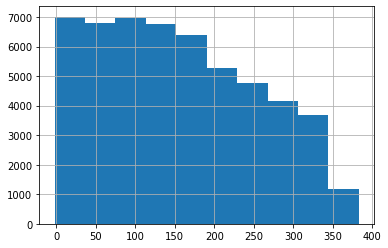

In [57]:
df[df.HotelID.isin(['x11082', 'x36'])]['num_days'].hist()

Q5. (a) 

In [34]:
df2 = df[df['as_of_date'] == '2020-06-01']
averageDf = df2.groupby('HotelID', as_index=False)['r2'].mean()
averageDf.sort_values(by=['r2'], ascending=False).head(10)

,HotelID,r2
39,x38,862.857143
45,x46,715.642857
38,x37,370.035714
35,x36,191.409836
7,x14287,122.065574
78,x65754,105.721311
9,x14690,94.032787
14,x1617,90.885246
82,x65807,90.786885
4,x12144,80.442623


Q5. (b) 

In [61]:
import plotly.express as px


In [69]:
df3 = averageDf.sort_values(by=['r2'], ascending=False).head(10)

In [70]:
for hotel in list(df3['HotelID']):
    fig = px.line(df2[df2['HotelID'] == hotel], x='stay_date', y=['r1','r2'])
    fig.show()
